<a href="https://colab.research.google.com/github/Ahtesham-Ibne-Mostafa/Machine_Etymology/blob/main/House_Price_Bangaluru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [64]:
df=pd.read_csv('https://raw.githubusercontent.com/Ahtesham-Ibne-Mostafa/Machine_Etymology/main/Datasets/bengaluru_house_prices.csv')

In [65]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [66]:
len(df.location.unique())

1306

In [67]:
df.shape

(13320, 9)

<BarContainer object of 13320 artists>

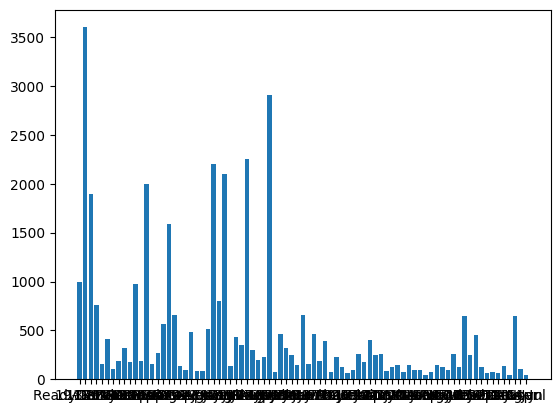

In [68]:
plt.bar(df.availability, df.price)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [70]:
len(df.society.unique())

2689

In [71]:
len(df.total_sqft.unique())

2117

In [72]:
def total_sqft(x):
  if '-' in x :
    x = x.split('-')
    x = (float(x[0])+float(x[1]))/2
  try :
    x=float(x)
    return x
  except :
    return None

df.total_sqft = df.total_sqft.apply(total_sqft)


In [73]:
df.total_sqft.isnull().sum()

46

In [74]:
df = df.dropna(subset='total_sqft')

In [75]:
df.total_sqft.isnull().sum()

0

In [76]:
df.shape

(13274, 9)

In [77]:
cor =df.corr()
cor

<ipython-input-77-f7462b26eb9a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor =df.corr()


,total_sqft,bath,balcony,price
total_sqft,1.000000,0.392743,0.148661,0.575559
bath,0.392743,1.000000,0.203675,0.455994
balcony,0.148661,0.203675,1.000000,0.120400
price,0.575559,0.455994,0.120400,1.000000


In [78]:
mean = df.total_sqft.mean()
std = df.total_sqft.std()

def outliar(x):
  up = mean + 3* std
  low = mean - 3*std

  if x > up or x < low :
    return mean
  else :
    return x

df.total_sqft = df.total_sqft.apply(outliar)

In [79]:
df['size'].value_counts()

2 BHK         5193
3 BHK         4301
4 Bedroom      824
4 BHK          588
3 Bedroom      542
1 BHK          534
2 Bedroom      325
5 Bedroom      294
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           58
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [80]:
def size(f):
  if type(f) == float:
    return None
  f = f.split(' ')
  return int(f[0])

df['size']=df['size'].apply(size)

In [81]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00


In [82]:
df['sqft_per_room'] = df['total_sqft']/df['size']

In [83]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,sqft_per_room
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07,528.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00,650.0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00,480.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00,507.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00,600.0


In [84]:
mean = df['size'].mean()
std = df['size'].std()

def outliar(x):
  up = mean + 3* std
  low = mean - 3*std

  if x > up or x < low :
    return None
  else :
    return x

df['size'] = df['size'].apply(outliar)

In [98]:
df = df.dropna(subset='size')

In [85]:
df.sqft_per_room.max()

3820.0

In [87]:
df.sqft_per_room.min()

0.25

In [88]:
df.corr()

<ipython-input-88-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,size,total_sqft,bath,balcony,price,sqft_per_room
size,1.000000,0.562275,0.850041,0.230802,0.450488,-0.188735
total_sqft,0.562275,1.000000,0.508490,0.228720,0.509106,0.600175
bath,0.850041,0.508490,1.000000,0.203675,0.455994,-0.140468
balcony,0.230802,0.228720,0.203675,1.000000,0.120400,0.035113
price,0.450488,0.509106,0.455994,0.120400,1.000000,0.196752
sqft_per_room,-0.188735,0.600175,-0.140468,0.035113,0.196752,1.000000


In [89]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [91]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df["area_type"] = encoder.fit_transform(df["area_type"])

In [92]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,sqft_per_room
0,3,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07,528.0
1,2,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00,650.0
2,0,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00,480.0
3,3,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00,507.0
4,3,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00,600.0


In [93]:
df.corr()

<ipython-input-93-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,area_type,size,total_sqft,bath,balcony,price,sqft_per_room
area_type,1.000000,-0.117780,-0.074407,-0.101083,0.096547,-0.056967,0.035270
size,-0.117780,1.000000,0.562275,0.850041,0.230802,0.450488,-0.188735
total_sqft,-0.074407,0.562275,1.000000,0.508490,0.228720,0.509106,0.600175
bath,-0.101083,0.850041,0.508490,1.000000,0.203675,0.455994,-0.140468
balcony,0.096547,0.230802,0.228720,0.203675,1.000000,0.120400,0.035113
price,-0.056967,0.450488,0.509106,0.455994,0.120400,1.000000,0.196752
sqft_per_room,0.035270,-0.188735,0.600175,-0.140468,0.035113,0.196752,1.000000


In [95]:
df.drop(['society','availability'],axis=1, inplace = True)

In [96]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,sqft_per_room
0,3,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,528.0
1,2,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,650.0
2,0,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,480.0
3,3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,507.0
4,3,Kothanur,2.0,1200.0,2.0,1.0,51.00,600.0


In [106]:
df = df.dropna(subset=['bath','location'])

In [102]:
df.balcony = df.balcony.fillna(df.balcony.mean())

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12934 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      12934 non-null  int64  
 1   location       12934 non-null  object 
 2   size           12934 non-null  float64
 3   total_sqft     12934 non-null  float64
 4   bath           12934 non-null  float64
 5   balcony        12934 non-null  float64
 6   price          12934 non-null  float64
 7   sqft_per_room  12934 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 909.4+ KB


In [108]:
df["location"] = encoder.fit_transform(df['location'])

In [109]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,sqft_per_room
0,3,403,2.0,1056.0,2.0,1.0,39.07,528.0
1,2,301,4.0,2600.0,5.0,3.0,120.00,650.0
2,0,1144,3.0,1440.0,2.0,3.0,62.00,480.0
3,3,735,3.0,1521.0,3.0,1.0,95.00,507.0
4,3,696,2.0,1200.0,2.0,1.0,51.00,600.0


In [110]:
target='price'

In [111]:
X= df.loc[:,df.columns != target]
Y= df[target]

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [116]:
X.head()

,area_type,location,size,total_sqft,bath,balcony,sqft_per_room
0,3,403,2.0,1056.0,2.0,1.0,528.0
1,2,301,4.0,2600.0,5.0,3.0,650.0
2,0,1144,3.0,1440.0,2.0,3.0,480.0
3,3,735,3.0,1521.0,3.0,1.0,507.0
4,3,696,2.0,1200.0,2.0,1.0,600.0


In [117]:
Y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [118]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12934 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      12934 non-null  int64  
 1   location       12934 non-null  int64  
 2   size           12934 non-null  float64
 3   total_sqft     12934 non-null  float64
 4   bath           12934 non-null  float64
 5   balcony        12934 non-null  float64
 6   sqft_per_room  12934 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 808.4 KB


In [119]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 12934 entries, 0 to 13319
Series name: price
Non-Null Count  Dtype  
--------------  -----  
12934 non-null  float64
dtypes: float64(1)
memory usage: 202.1 KB


In [120]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, Y_train)

y_pred = gnb.predict(X_test)

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score

score = accuracy_score(Y_test,y_pred)

print(score)
